<a href="https://colab.research.google.com/github/KASA-RAHUL/EDA/blob/main/yulu_case__study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About YULU

<font color="purple">
Yulu is India's leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting. <br>
<font color="purple">
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!


<font color="purple">
Problem Statement
The company wants to know:
<font color="purple"> <br>
● Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
<font color="purple"> <br>
● How well those variables describe the electric cycle demands.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel #paired t test

In [ ]:
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2
#below is for CHI independent of test
from scipy.stats import chi2_contingency

In [ ]:
from scipy import stats  # Import the stats module

In [ ]:
from statsmodels.graphics.gofplots import qqplot

In [ ]:
from scipy.stats import shapiro
from scipy.stats import levene

In [ ]:
from scipy.stats import pearsonr,spearmanr

In [ ]:
sns.set(style="darkgrid")

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089 -O yulu.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/yulu.csv
100% 648k/648k [00:00<00:00, 11.4MB/s]


In [ ]:
df=pd.read_csv('yulu.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
for column in df.iloc[:, :9]:
  print(column)
  print('No. of Unique Values: ',df[column].nunique())
  print('Unique Values: ',df[column].unique())
  print()
  print("- _ -"*50)
  print()

datetime
No. of Unique Values:  10886
Unique Values:  ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']

- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -

season
No. of Unique Values:  4
Unique Values:  [1 2 3 4]

- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -

holiday
No. of Unique Values:  2
Unique Values:  [0 1]

- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- _ -- 

<font color="purple">
*   The dataframe has **10886 rows and 12 columns**, out of which there is only one categorical column (datetime), while the rest are all numerical. <br>
*   It captures **hourly** bike rental data, along with weather and date-time features.
<br>
*   The season variable is evenly distributed across four categories (Spring, Summer, Fall, Winter), with a mean of **2.51**, indicating no single season dominates the dataset.
<br>
*   Only**2.86%**of the data are holidays (mean ≈ 0.0286). <br>
*   About **68%** of the records are working days (mean ≈ 0.681).
<br>


*   Most values are concentrated in **category 1** (mean ≈ 1.42, close to 1), suggesting generally good weather conditions.
*   Average temperature is **20.23°C**, with an interquartile range (IQR) from **13.94°C to 26.24°C**, suggesting a mild climate overall.


<br>




*   The "feels like" temperature (atemp) averages slightly higher at **23.66°C**, and ranges from 0.76°C to 45.46°C.
<br>
*   Humidity varies widely, with a mean of **61.89%**, ranging from 0% to 100%, and an IQR of 47% to 77%.

<br>
*   Windspeed has a mean of **12.80 km/h,** with most values concentrated below 17 km/h, indicating typically light winds.

<br>
*   The average number of casual users per hour is **36.02**, with a wide range (0 to 367), showing a high variance in non-registered user activity.

<br>
*   Registered users average **155.55** per hour, with values going up to 886, highlighting that the majority of bike rentals are made by registered users.
<br>
*   The total bike rental count (count) has a mean of **191.57**, a median of 145, and ranges from 1 to 977. The high standard deviation (181.14) reflects substantial hourly variation.
<br>



In [ ]:
print(df.info())
print("- "*50)
print("Null data ")
print()
print(df.isnull().sum())
print("- "*50)
print(" Shape of data ")
print()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Null data 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windsp

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
df['workingday'].unique()

array([0, 1])

- 0 is Weekend nor Holiday
- 1 is weekday

In [ ]:
df['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


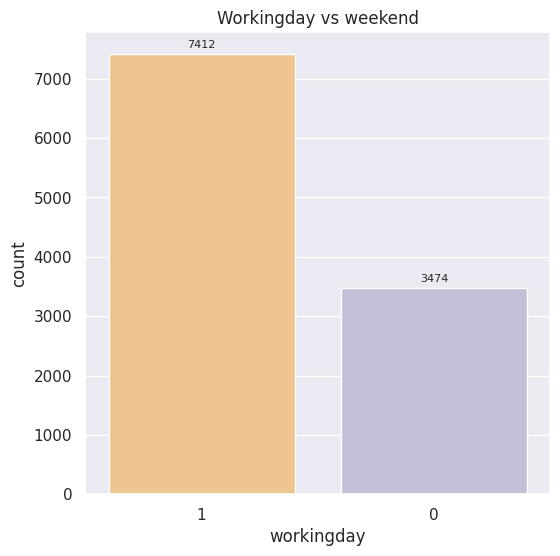

In [ ]:
plt.figure(figsize=(6, 6))
ax=sns.countplot(x='workingday', data=df, order=df['workingday'].value_counts().index,palette='PuOr')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=3)

plt.title('Workingday vs weekend')
plt.show()

<font color="purple"> By observing the above graph <br>
The data shows a  difference in bike rental counts between working days and weekends:
<font color="purple">
Working Days (1) → 7,412 rentals
Weekends (0) → 3,474 rentals <br>
Most of the people are using on working days

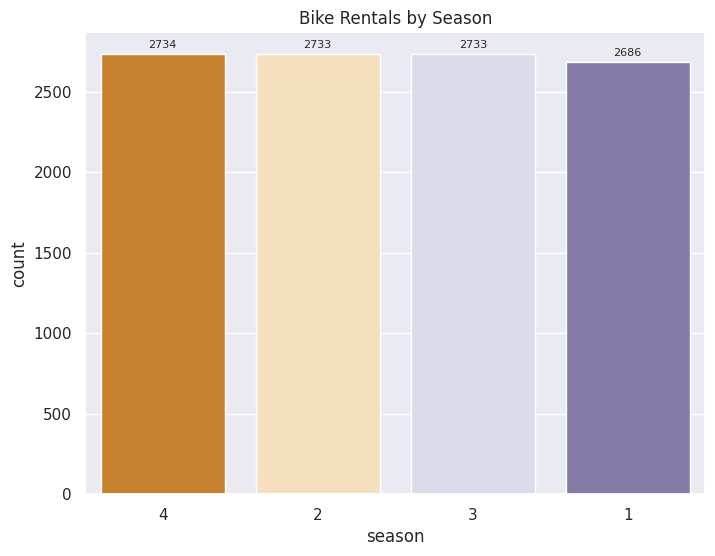

In [ ]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='season', data=df, order=df['season'].value_counts().index,palette='PuOr')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=3)

plt.title('Bike Rentals by Season')
plt.show()

<font color="purple">
1.  spring <br>
2.  summer <br>
3.  fall <br>
4.  winter
</font>

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

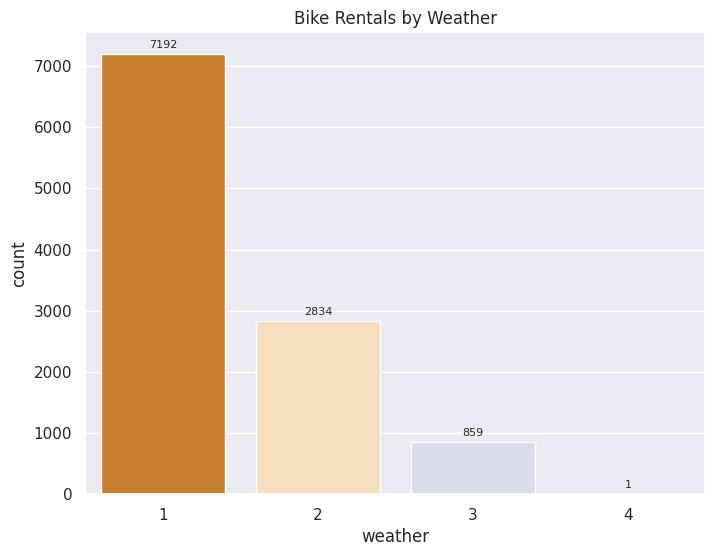

In [ ]:
plt.figure(figsize=(8, 6))
ax=sns.countplot(x='weather', data=df, order=df['weather'].value_counts().index,palette='PuOr')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=3)

plt.title('Bike Rentals by Weather')
plt.show()

<font color="purple">
weather:<br>
1. Clear, Few clouds, partly cloudy, partly cloudy<br>
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
 </font>

<font color="purple">
**Categorical Features Insights**
1. season
Distribution: Fairly even across all four seasons.

Insight: Dataset is seasonally balanced, enabling fair seasonal trend analysis.

2. holiday
Distribution: Strongly imbalanced; very few holidays.

Insight: Rentals during holidays can be treated as anomalous or special cases due to rarity.

3. workingday
Distribution: About 2/3 of the data are working days.

Insight: Most rentals occur on working days — possibly due to commuting usage.

4. weather
Distribution: Majority of entries are in weather category 1 (clear/few clouds).

Insight: Favorable weather dominates, so extreme conditions are underrepresented.

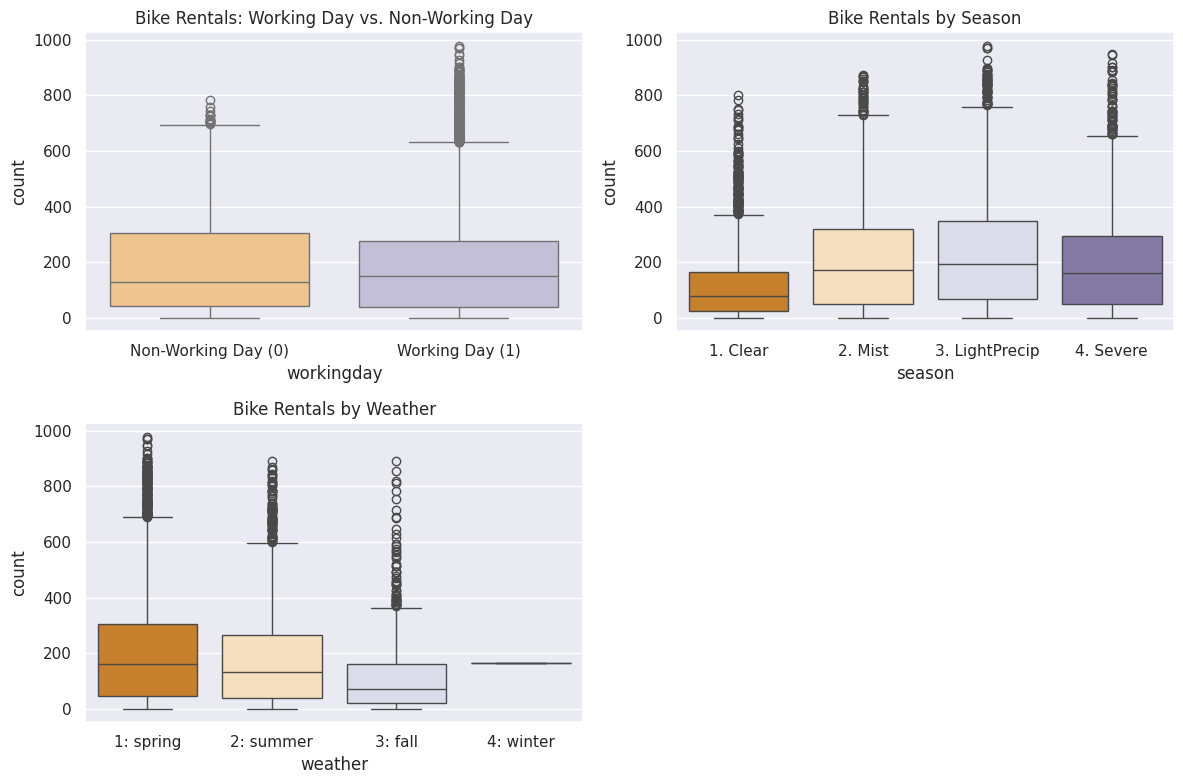

In [ ]:
# Plot relationships
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
ax1 = sns.boxplot(x='workingday', y='count', data=df, palette='PuOr')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Non-Working Day (0)', 'Working Day (1)'], rotation=0)
plt.title("Bike Rentals: Working Day vs. Non-Working Day")
#plt.show()

plt.subplot(2, 2, 2)
ax2 = sns.boxplot(x='season', y='count', data=df, palette='PuOr')
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels([ '1. Clear', '2. Mist', '3. LightPrecip', '4. Severe'], rotation=0)
plt.title("Bike Rentals by Season")
#plt.show()

plt.subplot(2, 2, 3)
ax3 = sns.boxplot(x='weather', y='count', data=df, palette='PuOr')
ax3.set_xticks([0, 1, 2, 3])
ax3.set_xticklabels(['1: spring', '2: summer', '3: fall', '4: winter'], rotation=0)
plt.title("Bike Rentals by Weather")
#plt.show()

plt.tight_layout()

plt.show()

In [ ]:
num_cols = df.select_dtypes(include="number").columns

In [ ]:
# Clipping outliers using IQR for each numerical column
df_no_outliers = df.copy()
for col in num_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers[col] = df_no_outliers[col].clip(lower_bound, upper_bound)


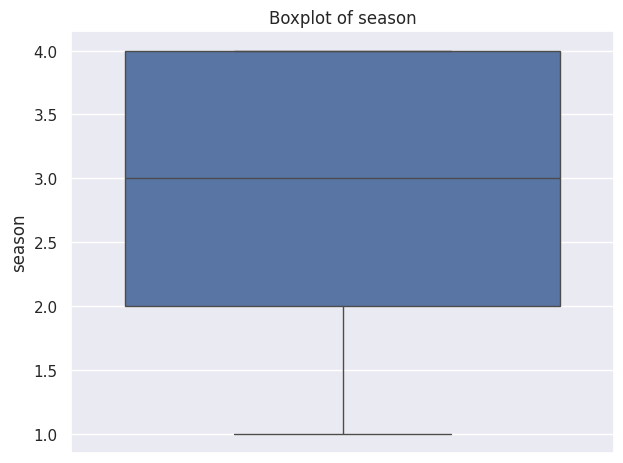

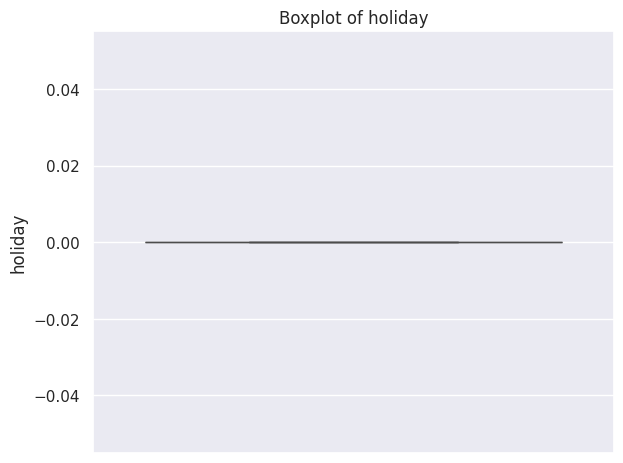

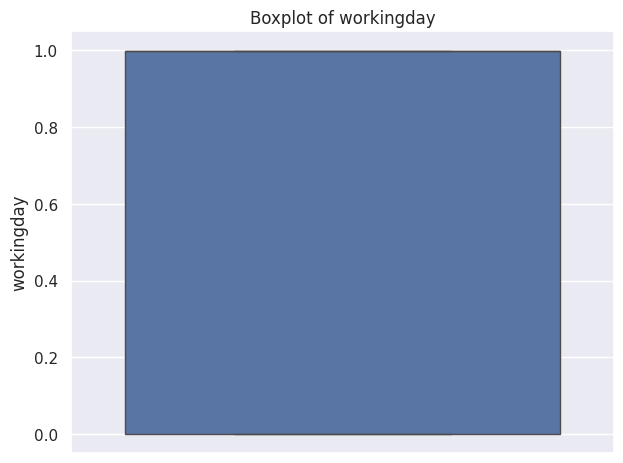

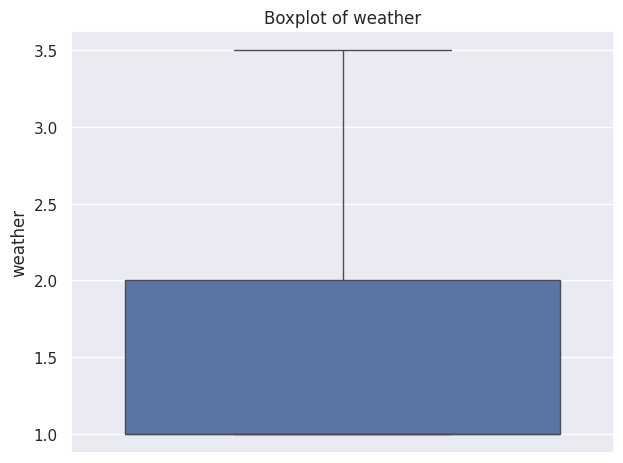

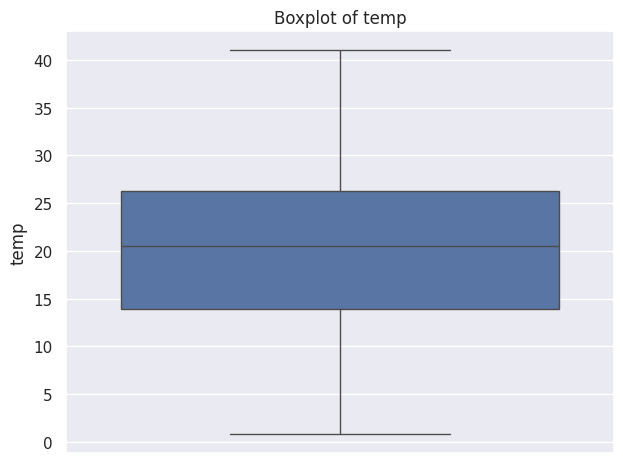

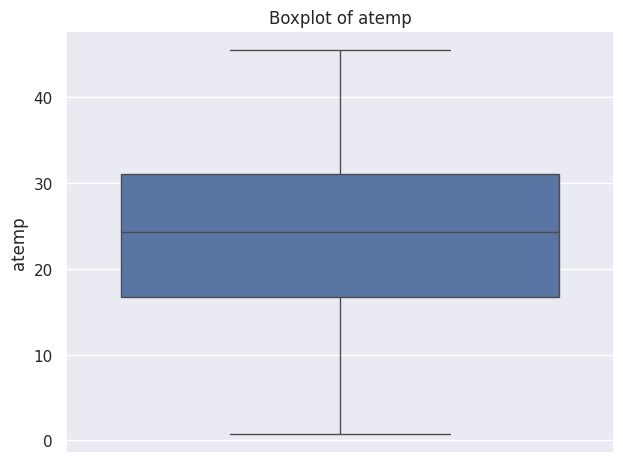

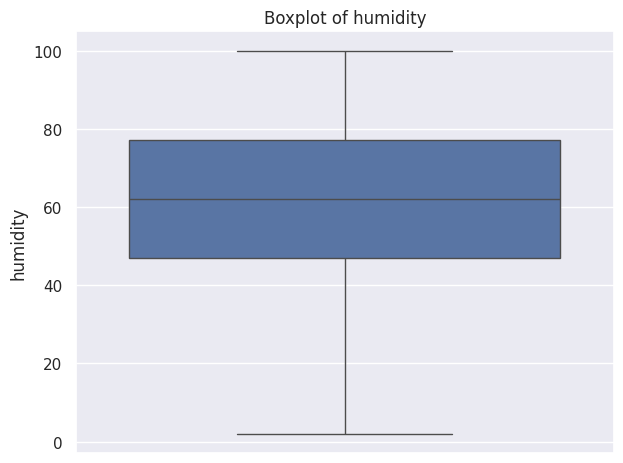

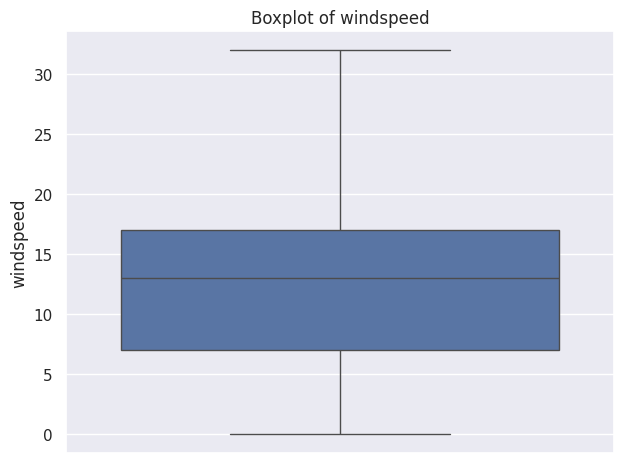

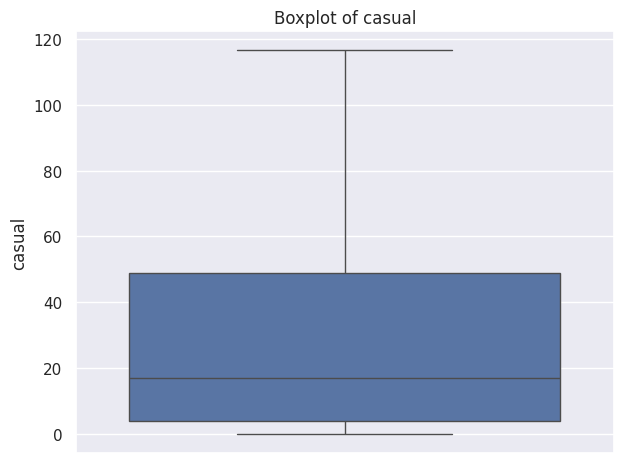

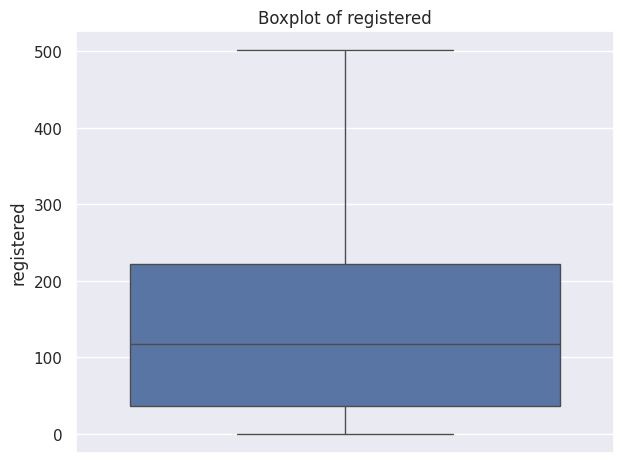

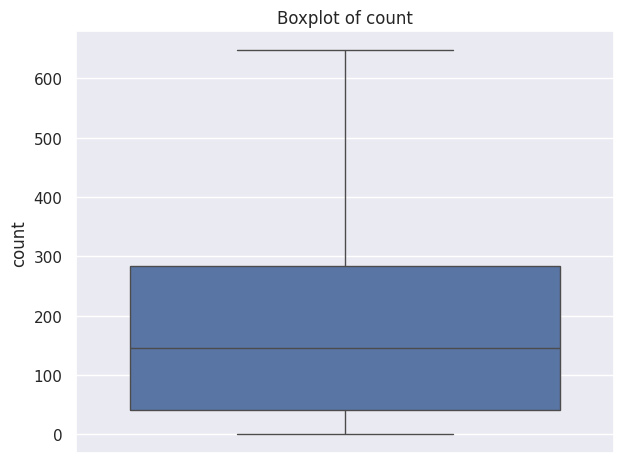

In [ ]:
#Plotting boxplots after clipping outliers

# plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    # plt.subplot(4, 2, i)
    sns.boxplot(y=df_no_outliers[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
# plt.tight_layout()
# plt.show()


In [ ]:
#Plotting a correlation heatmap

df_no_outliers.corr()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.480021,NaN,-0.003658,-0.005054,0.180986,0.181823,0.032586,-0.084962,0.181884,0.312850,0.308453
season,0.480021,1.000000,NaN,-0.008126,0.008979,0.258689,0.264744,0.190453,-0.143692,0.122969,0.169196,0.165741
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workingday,-0.003658,-0.008126,NaN,1.000000,0.033731,0.029966,0.024660,-0.010743,0.015238,-0.270948,0.108074,0.003032
weather,-0.005054,0.008979,NaN,0.033731,1.000000,-0.054938,-0.055286,0.407026,0.003978,-0.150282,-0.115598,-0.130907
temp,0.180986,0.258689,NaN,0.029966,-0.054938,1.000000,0.984948,-0.065107,-0.015521,0.542221,0.330598,0.399567
atemp,0.181823,0.264744,NaN,0.024660,-0.055286,0.984948,1.000000,-0.043673,-0.055305,0.535456,0.326758,0.395062
humidity,0.032586,0.190453,NaN,-0.010743,0.407026,-0.065107,-0.043673,1.000000,-0.320164,-0.378298,-0.283272,-0.323867
windspeed,-0.084962,-0.143692,NaN,0.015238,0.003978,-0.015521,-0.055305,-0.320164,1.000000,0.110620,0.103144,0.109054
casual,0.181884,0.122969,NaN,-0.270948,-0.150282,0.542221,0.535456,-0.378298,0.110620,1.000000,0.599660,0.744425


In [ ]:

df['holiday'].value_counts(normalize=True)

,proportion
holiday,
0,0.971431
1,0.028569


<font color='purple'>
On Holidays only 2.8% of people are using yulu bikes <br>
On Non-Holidays 97.1% of people are using yulu bikes

In [ ]:

df['workingday'].value_counts(normalize=True)

,proportion
workingday,
1,0.680875
0,0.319125


<font color='purple'>
Most of people are using yulu bikes on working days

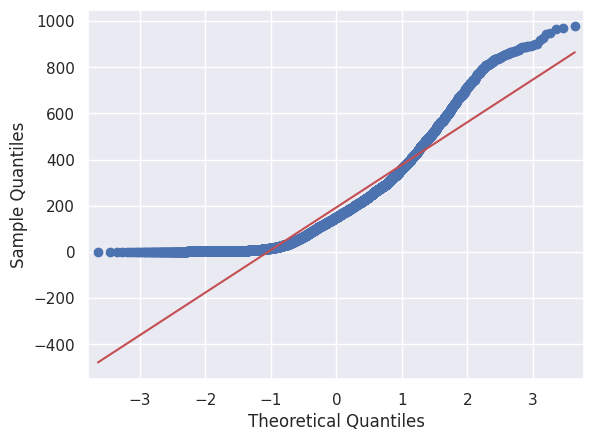

In [ ]:
qqplot(df[df['workingday'] == 1]['count'], line="s")
plt.show()

<font color='purple'>
qq plot of Working days

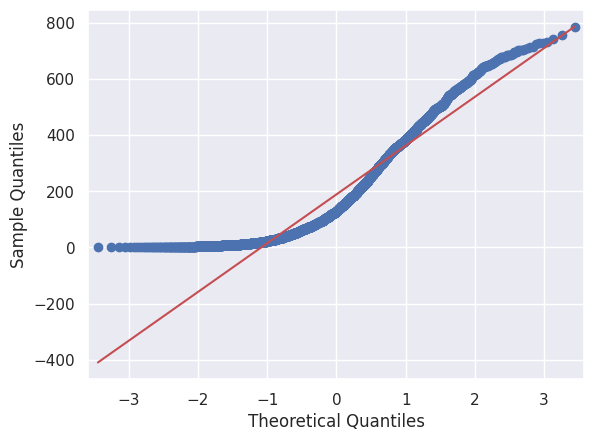

In [ ]:
qqplot(df[df['workingday'] == 0]['count'], line="s")
plt.show()

<font color='purple'>
qq plot of Non Working days

In [ ]:
working_day = df[df['workingday'] == 1]['count']
non_working_day = df[df['workingday'] == 0]['count']

# Check Normality (Shapiro-Wilk)
print(stats.shapiro(working_day))  # p-value > 0.05 → Normal

# if p_value < 0.05:
#     print("Reject H0")
#     print("Data is not Gaussian")
# else:
#     print("Fail to reject H0")
#     print("Data is Gaussian")

print("_-_-"*50)
print(stats.shapiro(non_working_day))  # p-value > 0.05 → Normal

# if p_value < 0.05:
#     print("Reject H0")
#     print("Data is not Gaussian")
# else:
#     print("Fail to reject H0")
#     print("Data is Gaussian")

print("_-_-"*50)
# Check Equal Variance (Levene’s Test)
print(stats.levene(working_day, non_working_day))  # p-value > 0.05 → Equal variance

# if p_value < 0.05:
#     print("Reject H0")
#     print("Not Equal variance")
# else:
#     print("Fail to reject H0")
#     print("Equal variance")

print("_-_-"*50)
# Perform t-test
t_stat, p_val = stats.ttest_ind(working_day, non_working_day, equal_var=True)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("Reject H0")
    print("working days affect rentals")
else:
    print("Fail to reject H0")
    print("working days not affect rentals")

ShapiroResult(statistic=np.float64(0.8702545795617624), pvalue=np.float64(2.2521124830019574e-61))
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
ShapiroResult(statistic=np.float64(0.885211755076074), pvalue=np.float64(4.4728547627911074e-45))
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
LeveneResult(statistic=np.float64(0.004972848886504472), pvalue=np.float64(0.9437823280916695))
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
T-statistic: 1.2096277376026694, P-value: 0.22644804226361348
Fail to reject H0
working days not affect 

In [ ]:
a=10
print('hello',a)

hello 10


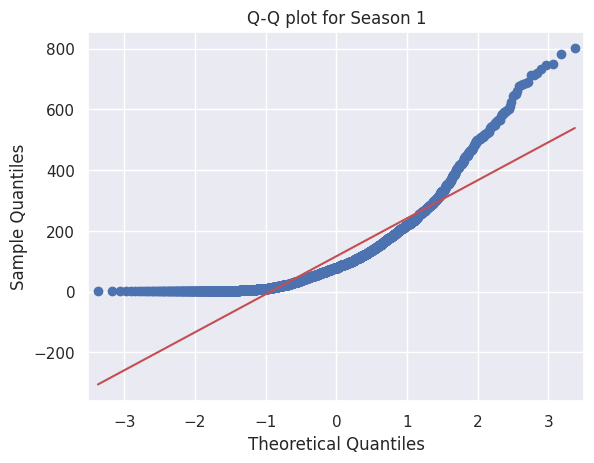

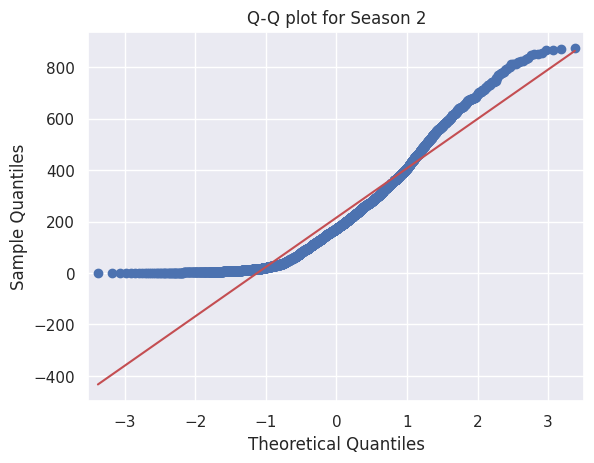

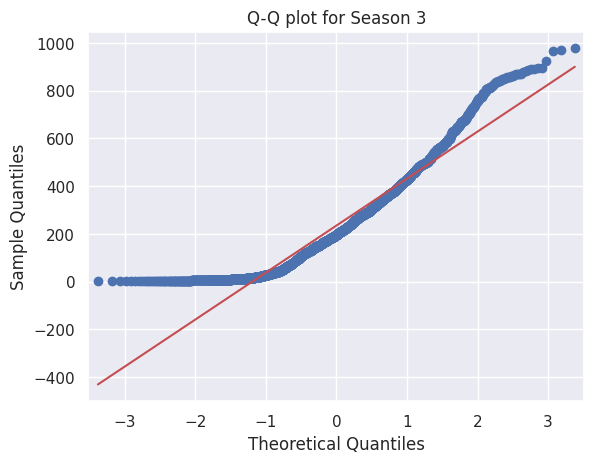

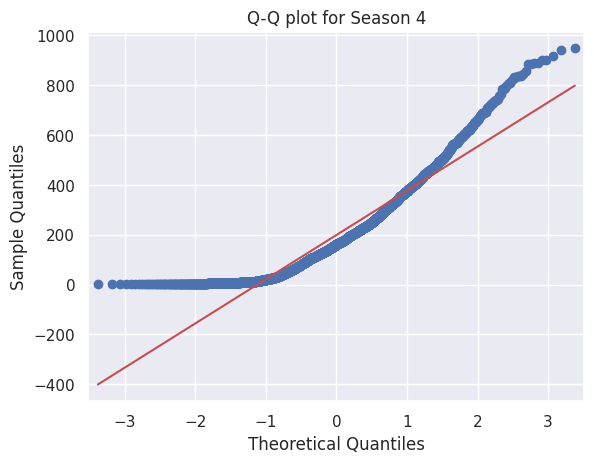

In [ ]:
for i in range(1,5):
    qqplot(df[df['season'] == i]['count'], line="s")
    plt.title(f"Q-Q plot for Season {i}")
    plt.show()

In [ ]:
season_groups = [df[df['season'] == i]['count'] for i in range(1,5)]

# Check Normality (Shapiro-Wilk per group)
for i in range(4):
    print(f"Season {i+1}:", stats.shapiro(season_groups[i])) #t_stat, p_val =
    if p_val < 0.05:
      print("Reject H0")
      print("Data is not Gaussian")
    else:
      print("Fail to reject H0")
      print("Data is Gaussian")
    print("_-_-"*50)

# Check Equal Variance (Levene’s)
print(stats.levene(*season_groups))
if p_val < 0.05:
    print("Reject H0")
    print("Not Equal variance")
else:
    print("Fail to reject H0")
    print("Equal variance")
print("_-_-"*50)

# Perform ANOVA
f_stat, p_val = stats.f_oneway(*season_groups)
print(f"F-statistic: {f_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Reject H0")
    print("season affects rentals")
else:
    print("Fail to reject H0")
    print("season Not affects rentals")

Season 1: ShapiroResult(statistic=np.float64(0.8087378401253588), pvalue=np.float64(8.749584618867662e-49))
Reject H0
Data is not Gaussian
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Season 2: ShapiroResult(statistic=np.float64(0.9004818080893252), pvalue=np.float64(6.039374406270491e-39))
Reject H0
Data is not Gaussian
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Season 3: ShapiroResult(statistic=np.float64(0.9148166372899196), pvalue=np.float64(1.043680518918597e-36))
Reject H0
Data is not Gaussian
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_

In [ ]:
weather_groups = [df[df['weather'] == i]['count'] for i in range(1,5)]

# Check Normality (Shapiro-Wilk)
for i in range(4):
    print(f"Weather {i+1}:", stats.shapiro(weather_groups[i]))
    print("_-_-"*50)

# If assumptions fail, use Kruskal-Wallis
h_stat, p_val = stats.kruskal(*weather_groups)
print(f"H-statistic: {h_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("Reject H0")
    print("weather affects rentals")
else:
    print("Fail to reject H0")
    print("weather Not affects rentals")

Weather 1: ShapiroResult(statistic=np.float64(0.8909259459740138), pvalue=np.float64(1.5964921477006555e-57))
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Weather 2: ShapiroResult(statistic=np.float64(0.8767694973495206), pvalue=np.float64(9.777839106111785e-43))
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Weather 3: ShapiroResult(statistic=np.float64(0.7674327906035717), pvalue=np.float64(3.875893017396149e-33))
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Weather 4: ShapiroResult(statistic=np.float64(nan), pvalue=np.float64

In [ ]:
contingency_table = pd.crosstab(df['weather'], df['season'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2-statistic: {chi2_stat}, P-value: {p_val}")
if p_val < 0.05:
    print("Reject H0")
    print("weather depends on season")
else:
    print("Fail to reject H0")
    print("weather dont depends on season")

Chi2-statistic: 49.15865559689363, P-value: 1.5499250736864862e-07
Reject H0
weather depends on season


<font color="purple">
 Recommendations

- Increase bike availability in peak seasons (summer/fall).
- Offer promotions on non-working days if demand is low.
- Monitor weather forecasts to adjust bike supply dynamically.
</font>

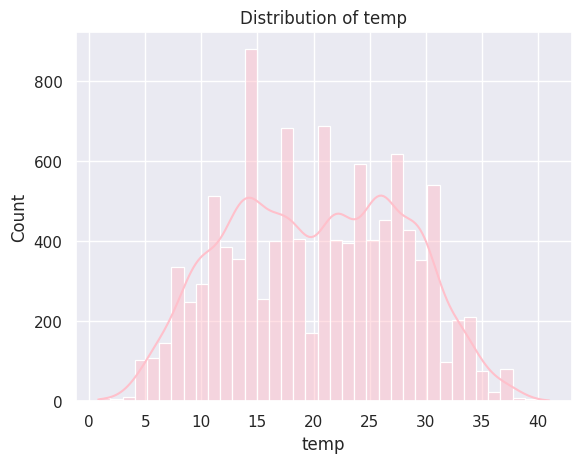

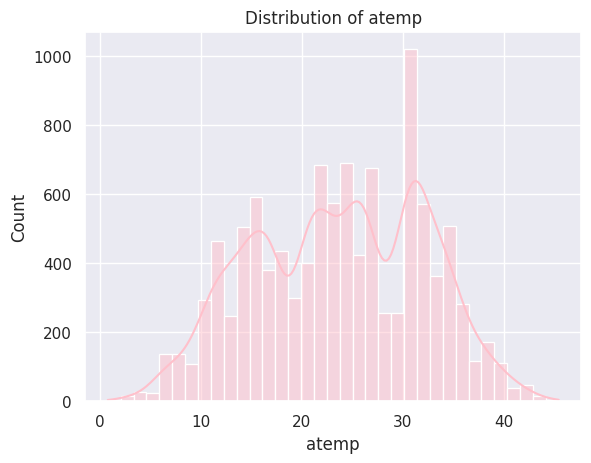

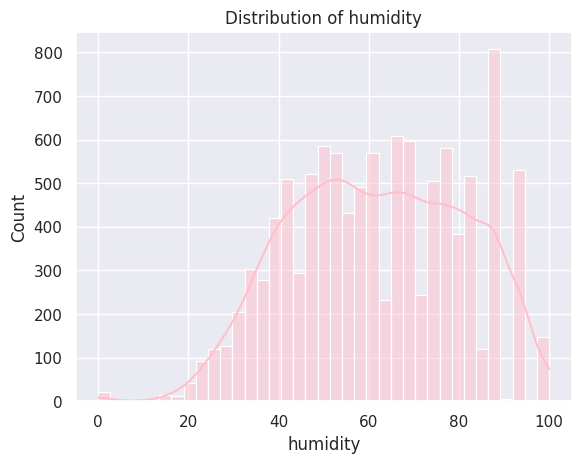

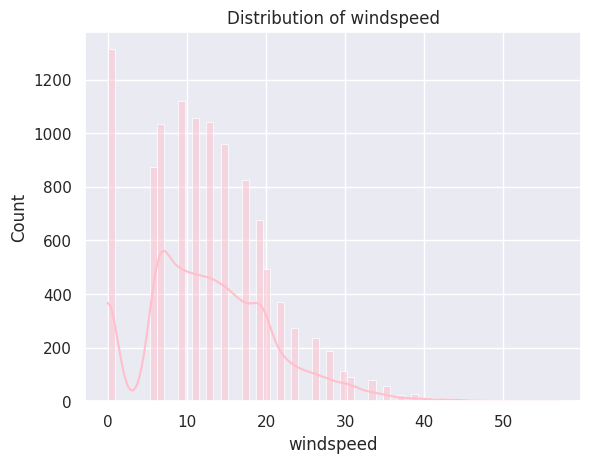

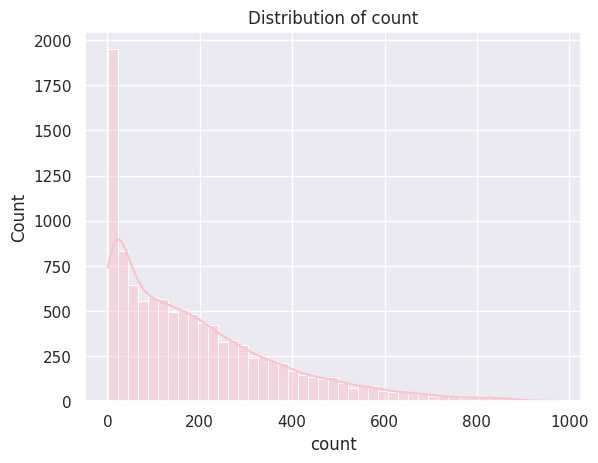

In [ ]:
cont_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
for var in cont_vars:
    sns.histplot(df[var], kde=True, color='pink')
    plt.title(f"Distribution of {var}")
    plt.show()

In [ ]:
#Converting datatypes to categorical
cat_cols = ['season', 'holiday', 'workingday', 'weather']
df[cat_cols] = df[cat_cols].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


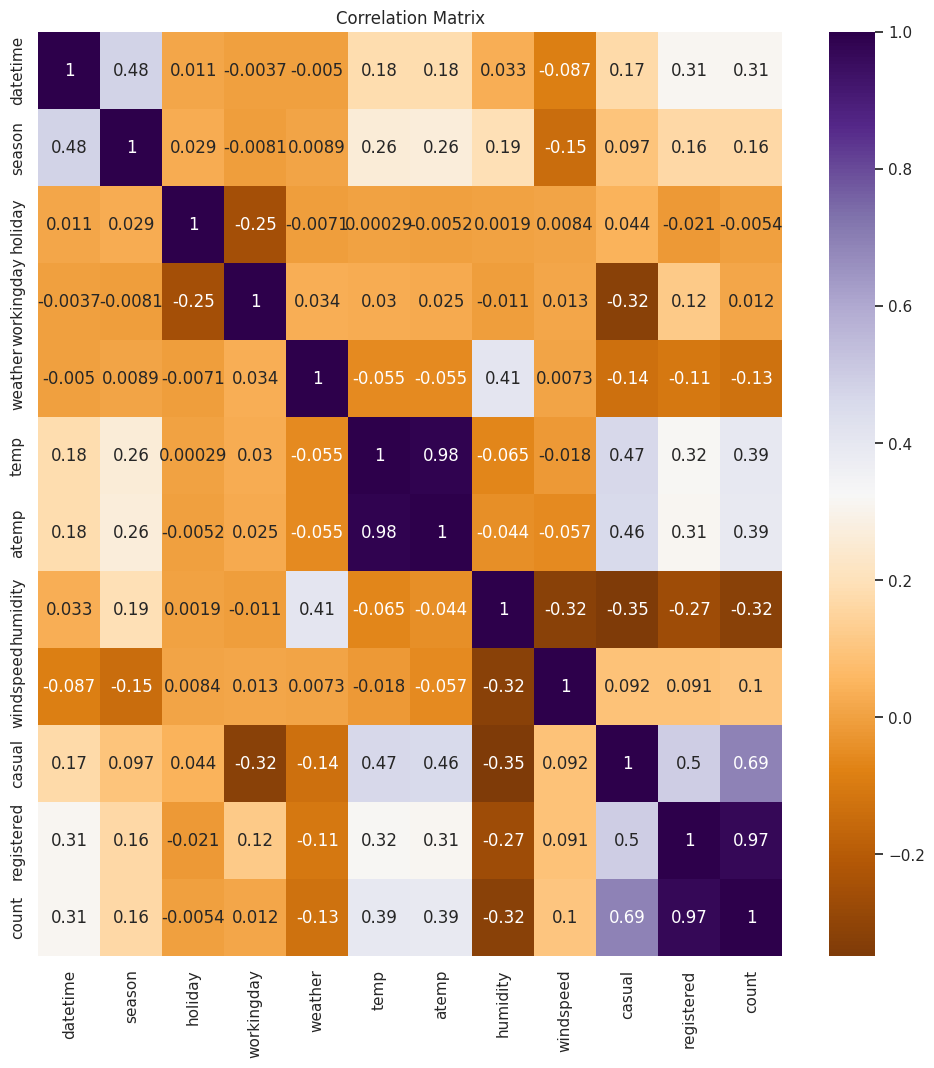

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap="PuOr")
plt.title("Correlation Matrix")
plt.show()

<Axes: >

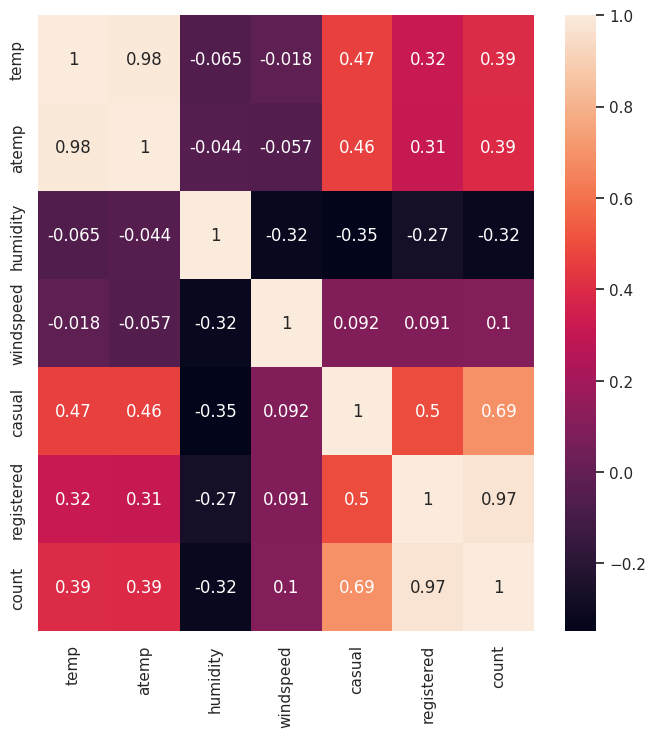

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: >

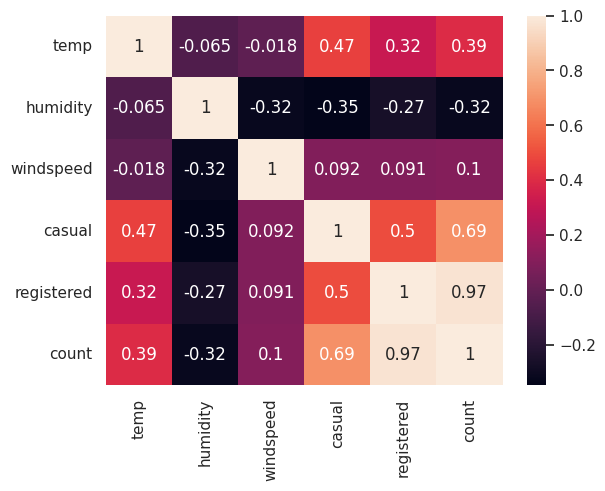

In [ ]:
df_reduced = df.drop(columns=['atemp'])
sns.heatmap(df_reduced.corr(numeric_only=True),annot=True)

<font color="purple">
Insights After Removing atemp:<br>
Avoided Multicollinearity:<br>
temp and atemp were almost perfectly correlated (~0.99).<br>
We kept temp (more intuitive), and removed atemp.
<br>
Now Independent Features Are More Distinct:

Remaining variables like temp, humidity, windspeed, etc., now each contribute more uniquely to explaining count.
</font>

In [ ]:
#Calculating Pearson and Spearman correlation
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    print(f'Testing Correlation between {col} and Total_riders ')
    pearson_coefficient,p_val = pearsonr(df[col],df['count'])
    spearman_coefficient,p_val = spearmanr(df[col],df['count'])
    pc = pearson_coefficient
    sc = spearman_coefficient
    if sc>0 :
        if sc>0.5:
            print('There is Strong Positive correlation between total_riders and', col,"- pearson-corrcoef: ",np.round(pc,2))
            print('There is Strong Positive correlation between total_riders and', col,"- spearman-corrcoef: ",np.round(sc,2))
        else:
            print('There is Weak Positive correlation between total_riders and', col,"- pearson-corrcoef: ",np.round(pc,2))
            print('There is weak Positive correlation between total_riders and', col,"- spearman-corrcoef: ",np.round(sc,2))
    if sc == 0:
        print('There is No correlation between total_riders and', col,"- pearson-corrcoef: ",np.round(pc,2))
        print('There is No correlation between total_riders and', col,"- spearman-corrcoef: ",np.round(sc,2))
    if sc< 0:
        if sc<0.5:
            print('There is Strong Negative correlation between total_riders and', col,"- pearson-corrcoef: ",np.round(pc,2))
            print('There is Strong Negative correlation between total_riders and', col,"- spearman-corrcoef: ",np.round(sc,2))
        else:
            print('There is Weak Positive correlation between total_riders and', col,"- pearson-corrcoef: ",np.round(pc,2))
            print('There is weak Positive correlation between total_riders and', col,"- spearman-corrcoef: ",np.round(sc,2))
    print()
    print('-'*100)
    print()

Testing Correlation between temp and Total_riders 
There is Weak Positive correlation between total_riders and temp - pearson-corrcoef:  0.39
There is weak Positive correlation between total_riders and temp - spearman-corrcoef:  0.41

----------------------------------------------------------------------------------------------------

Testing Correlation between atemp and Total_riders 
There is Weak Positive correlation between total_riders and atemp - pearson-corrcoef:  0.39
There is weak Positive correlation between total_riders and atemp - spearman-corrcoef:  0.41

----------------------------------------------------------------------------------------------------

Testing Correlation between humidity and Total_riders 
There is Strong Negative correlation between total_riders and humidity - pearson-corrcoef:  -0.32
There is Strong Negative correlation between total_riders and humidity - spearman-corrcoef:  -0.35

----------------------------------------------------------------------

In [ ]:
#Making a copy of df
df_HypTest = df_reduced.copy()

In [ ]:
#Splitting the datetime column into more details
df_HypTest['year'] = df_HypTest['datetime'].dt.year
df_HypTest['month'] = df_HypTest['datetime'].dt.month
df_HypTest['hour'] = df_HypTest['datetime'].dt.hour
df_HypTest['month_name'] = df_HypTest['datetime'].dt.month_name()
df_HypTest['day_name'] = df_HypTest['datetime'].dt.day_name()

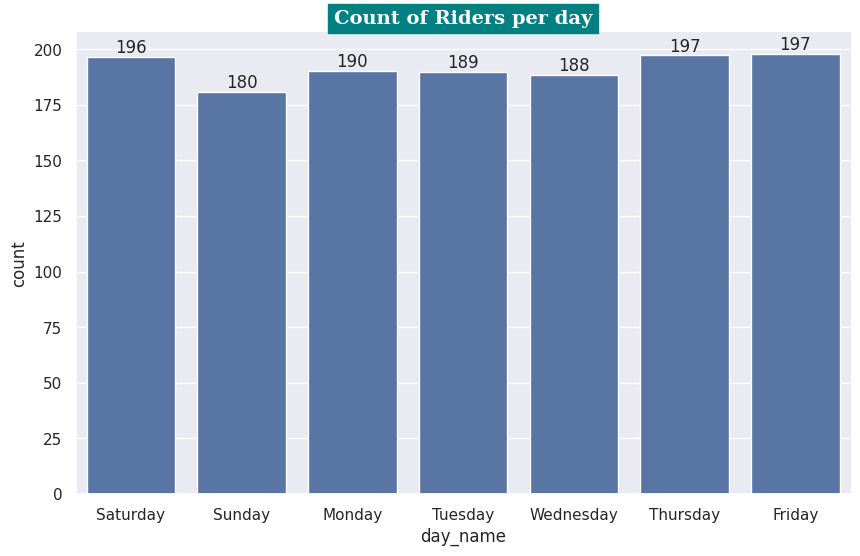

In [ ]:
#Plotting the count of riders per day
plt.figure(figsize=(10,6))
b=sns.barplot(data=df_HypTest, x="day_name", y="count",ci=None)
b.bar_label(b.containers[0], label_type='edge',fmt='%d')
plt.title('Count of Riders per day',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')
sns.despine()

plt.show()

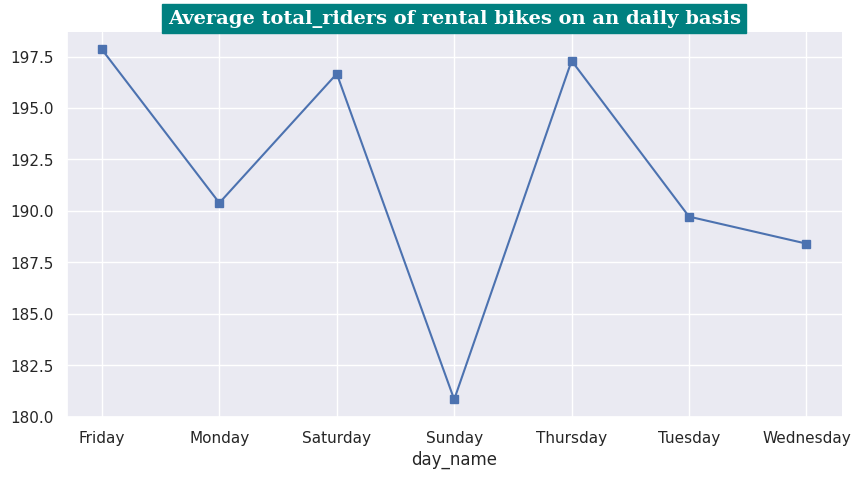

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Average total_riders of rental bikes on an daily basis"
          ,fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='teal',color='w')
df_HypTest.groupby(["day_name"])['count'].mean().plot(kind = 'line', marker = 's')
sns.despine()
plt.show()

<font color ="purple">
Friday and Saturday see the highest number of riders

month               1      2      3      4      5      6      7      8   \
year workingday                                                           
2011 0            7019   7324  10348  18516  20360  29537  37253  16049   
     1           16533  25520  28387  32001  59353  60239  55595  67247   
2012 0           19293  16484  30246  39029  35083  44537  35446  37545   
     1           37039  49785  64520  77856  85351  86420  86323  92675   

month               9      10     11     12  
year workingday                              
2011 0           31951  31642  22390  18202  
     1           47153  47880  48499  42981  
2012 0           48234  30701  40200  27483  
     1           85191  97211  65351  71494

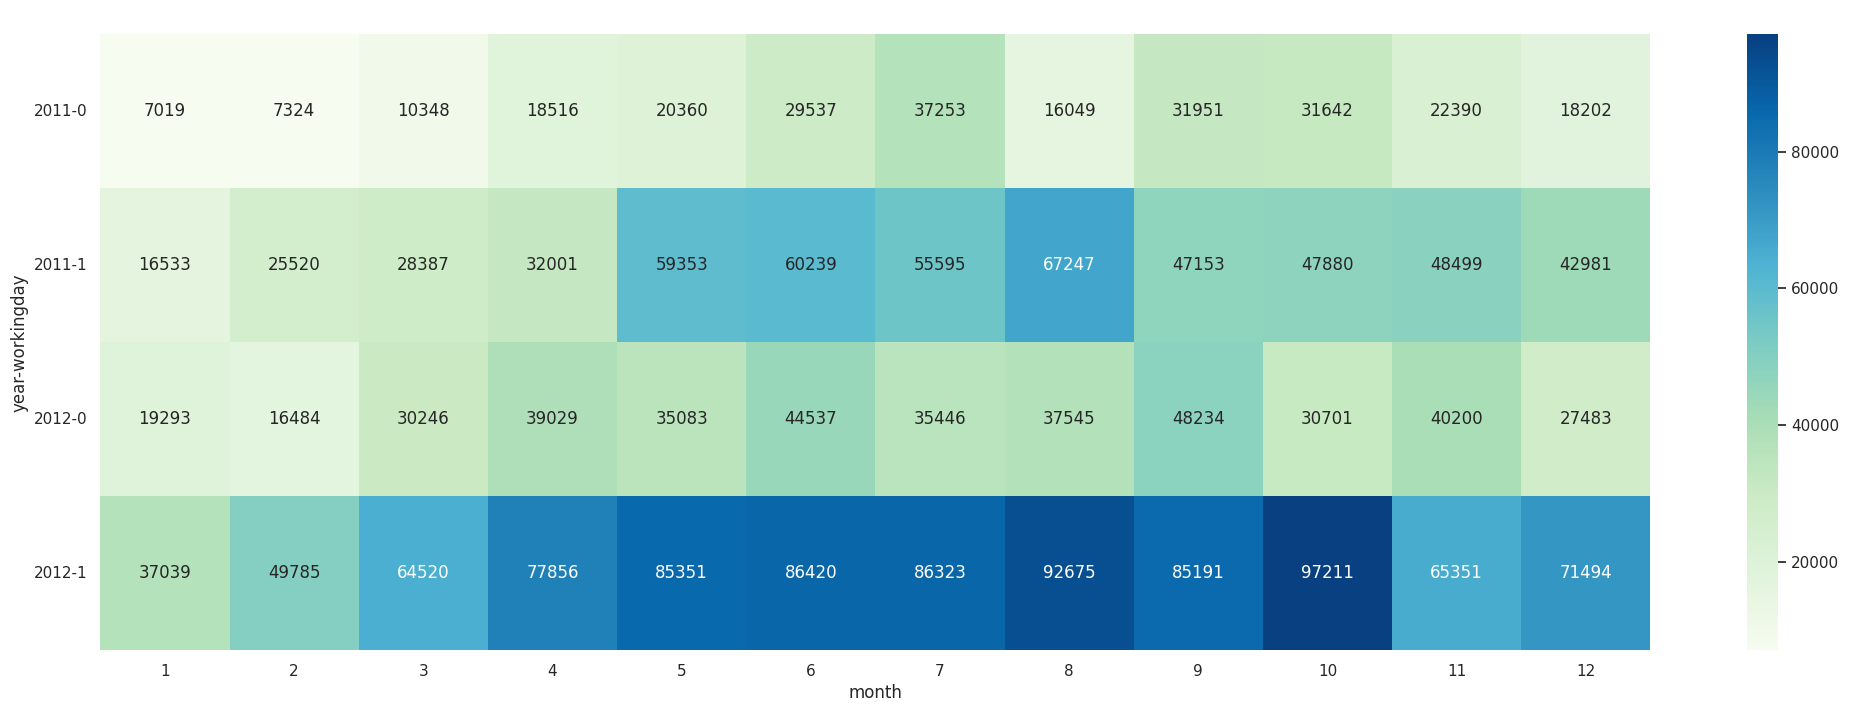

In [ ]:
#Plotting Heatmap to show relation between Year, month, workingday to total riders
ymwd=df_HypTest.groupby(['year','month','workingday'])['count'].sum()
data= ymwd.unstack(level=[1])
data.replace(np.nan,0, inplace=True)
display(data)
plt.figure(figsize=(25,8))
sns.heatmap(data, annot=True, fmt='.6g',cmap='GnBu')
plt.title('Heatmap to show relation between Year, month, workingday to total_riders rented E-bikes',
          fontsize=15,fontweight="bold",color='w')
plt.yticks(rotation=0)
plt.show()

In [ ]:
#Creating Contingency Table

contingency = pd.crosstab(df['season'], df['weather'])

print("Contingency Table (Season vs Weather):")
display(contingency)

Contingency Table (Season vs Weather):


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


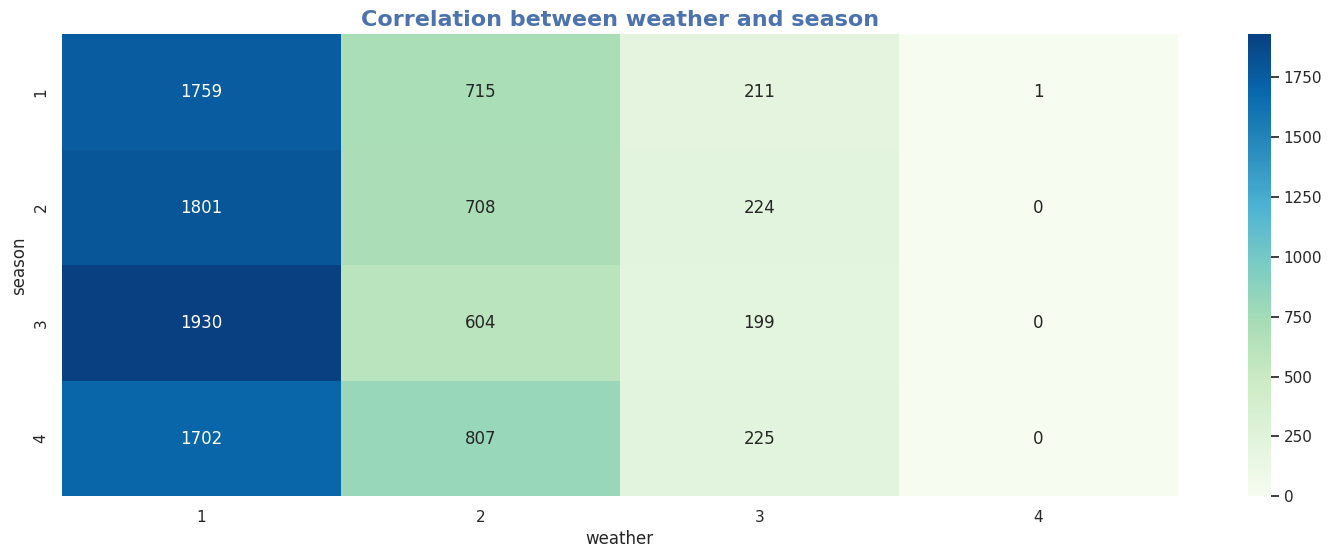

In [ ]:
plt.figure(figsize=(18,6))
sns.heatmap(contingency, annot=True, fmt='.6g',cmap='GnBu')
plt.title('Correlation between weather and season',fontsize=16,fontweight="bold",color='b')
plt.show()

<font color="purple">
Seasonal Weather Patterns Exist <br>
The Chi-square test shows a strong relationship between <br> weather and season. For example: <br>
<font color="purple">
Winter sees more misty/cloudy days. <br>
<font color="purple">
Fall and Summer tend to have more clear weather. <br>
<font color="purple">
Rainy days are somewhat spread but slightly higher in Spring and Winter. <br>
<font color="purple">
Snow is rare: Very few snowy records (only 1 in Spring, 0 in other seasons), suggesting this weather condition can be largely ignored for operational planning. <br>
<font color="purple">
Mist is most common in Winter, possibly due to colder temperatures and fog — relevant for safety and demand changes.

**Season-Specific Operational Planning**

Allocate more bikes and ensure higher maintenance during rainy/misty seasons (e.g., Spring and Winter).

Use lighter maintenance schedules during mostly clear seasons like Fall.


**Improve Safety Measures**

Promote helmet usage and caution during misty and rainy days, especially in Winter.


**Dynamic Pricing**

Introduce discounts during poor weather (e.g., rain or mist) to boost rentals if demand drops.

Higher pricing might be justified during consistently clear days (e.g., in Fall).


**Marketing Campaigns**

Tailor seasonal offers (e.g., “Winter Ride Deals” or “Spring Showers, Discounted Hours”) based on expected weather.


**Integrate Weather Forecasting**

Use weather predictions to adjust supply dynamically, optimize fleet distribution, and minimize idle bikes during bad weather.

1. **Weather Strongly Influences Demand**

Clear weather (Weather = 1) accounts for the majority of rentals (66%), with the highest average demand.

Poor weather (especially light rain/snow) reduces average rentals by up to 42% compared to clear days.


2. **Demand Volatility is High**
Even within each weather category, the standard deviation is high, suggesting that other factors (like time, season, or working day) also play a significant role in demand fluctuations.


3. **Heavy Rain (Weather = 4) is Rare**
There is only 1 record for Weather = 4, suggesting that severe weather is infrequent and has minimal impact on aggregate demand, though real-world effects may be substantial when it does occur.


4. **Seasonal Variation is Implied**
Though not fully explored yet, seasonality likely compounds with weather effects, e.g., clear weather in summer likely drives more demand than in winter.